Análise de SVM e Avaliação de Classificação Binária

Importando Bibliotecas


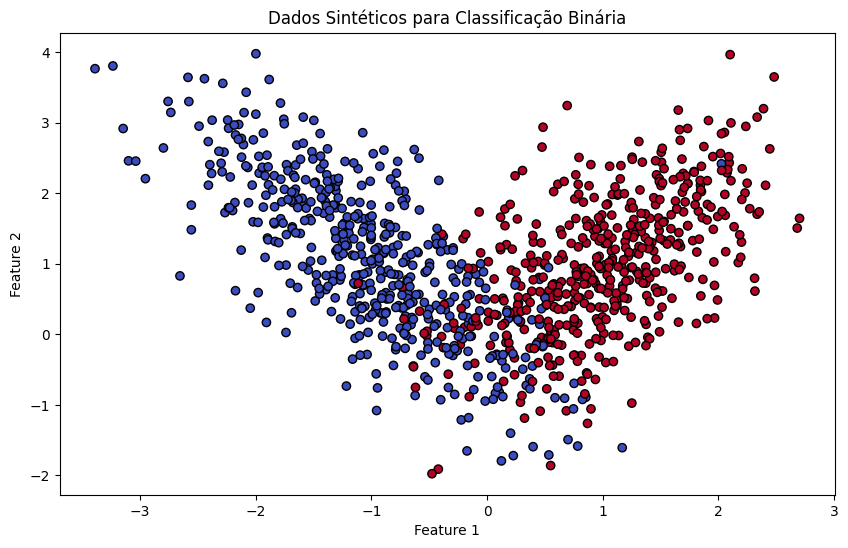

In [ ]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Criar um Conjunto de Dados Sintéticos para Classificação Binária
np.random.seed(0)
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2)

# Visualizar os dados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Dados Sintéticos para Classificação Binária')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Salvar os dados antes da padronização
np.savez('dados_sinteticos.npz', X=X, y=y)


Padronizar os dados

In [ ]:
# 2. Padronizar os Dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvar os dados depois da padronização
np.savez('dados_sinteticos_padronizados.npz', X=X_scaled, y=y)


Dividir o Conjunto de Dados em Treinamento e Teste

In [ ]:
# 3. Dividir o Conjunto de Dados em Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Verificar o tamanho dos conjuntos
print(f"Tamanho do conjunto de treinamento (não padronizado): {X_train.shape}")
print(f"Tamanho do conjunto de teste (não padronizado): {X_test.shape}")
print(f"Tamanho do conjunto de treinamento (padronizado): {X_train_scaled.shape}")
print(f"Tamanho do conjunto de teste (padronizado): {X_test_scaled.shape}")


Tamanho do conjunto de treinamento (não padronizado): (700, 2)
Tamanho do conjunto de teste (não padronizado): (300, 2)
Tamanho do conjunto de treinamento (padronizado): (700, 2)
Tamanho do conjunto de teste (padronizado): (300, 2)


Treinar o Modelo SVM com Diferentes Kernels e Otimizar os Parâmetros

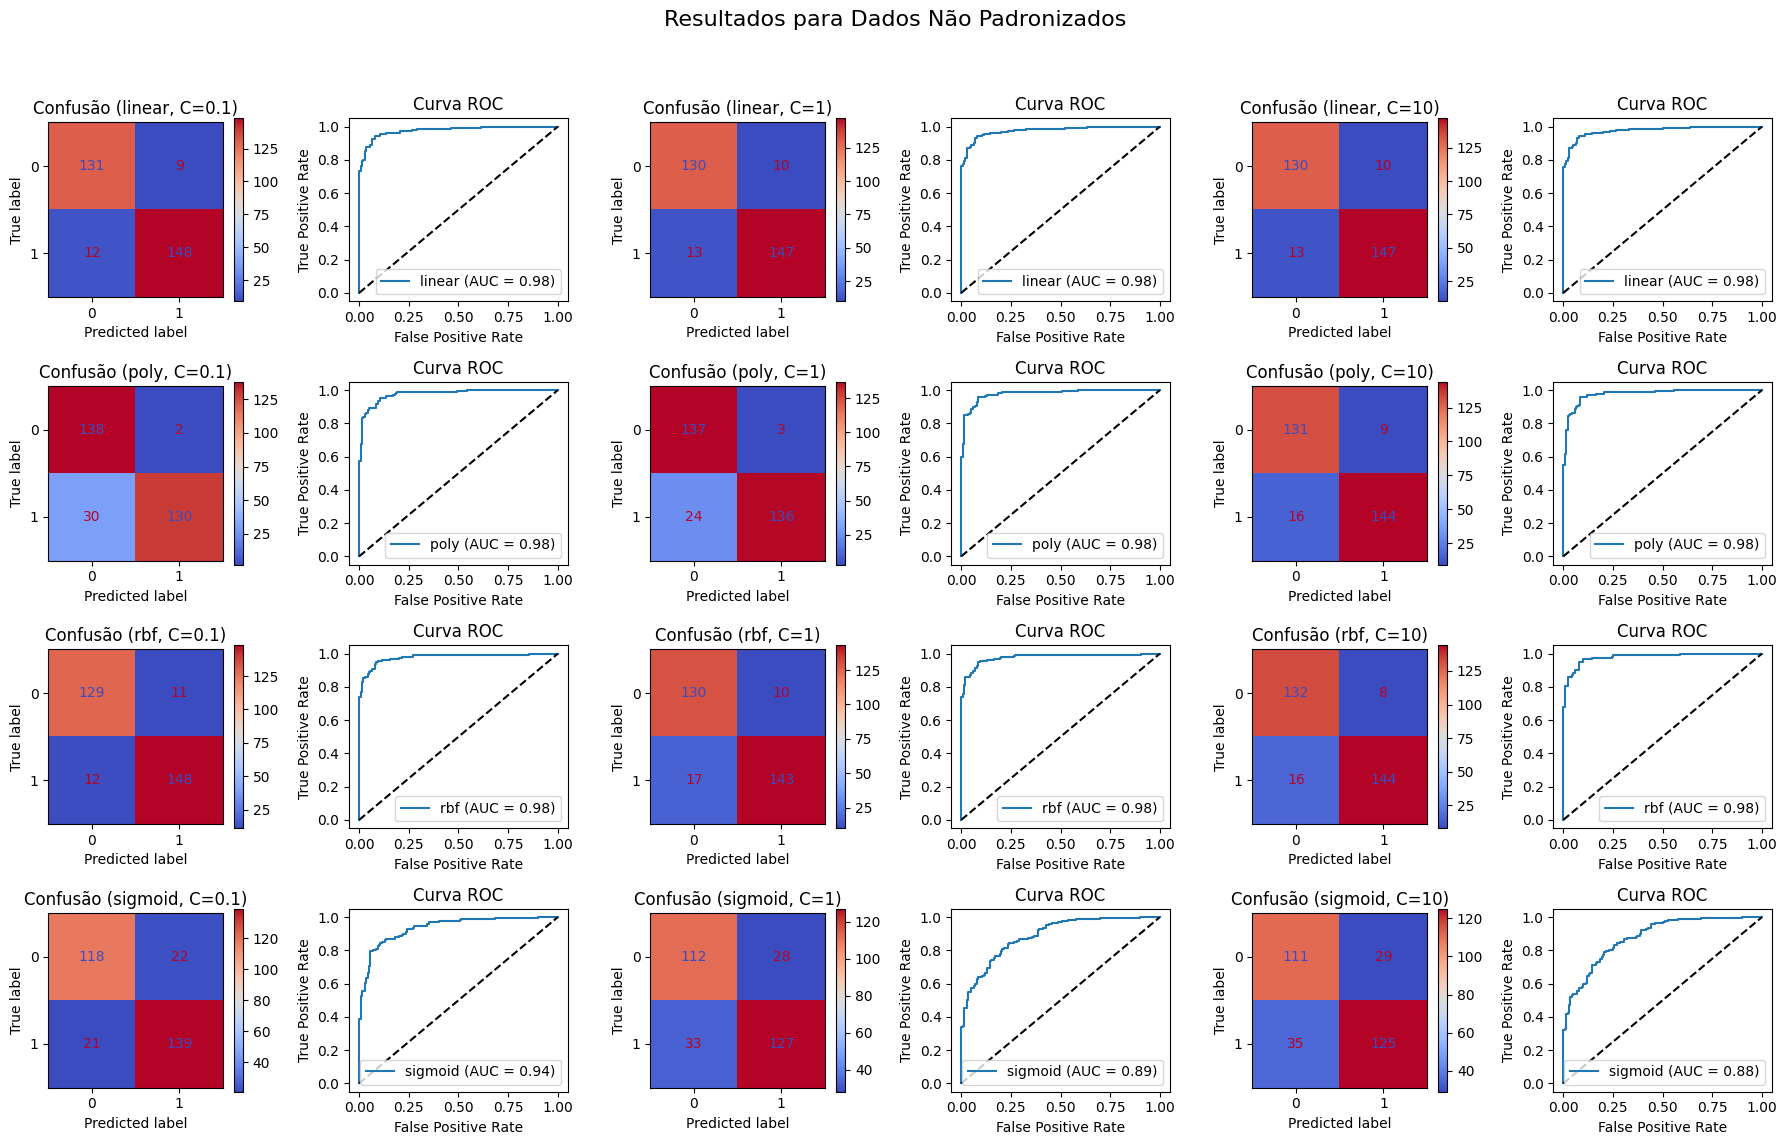

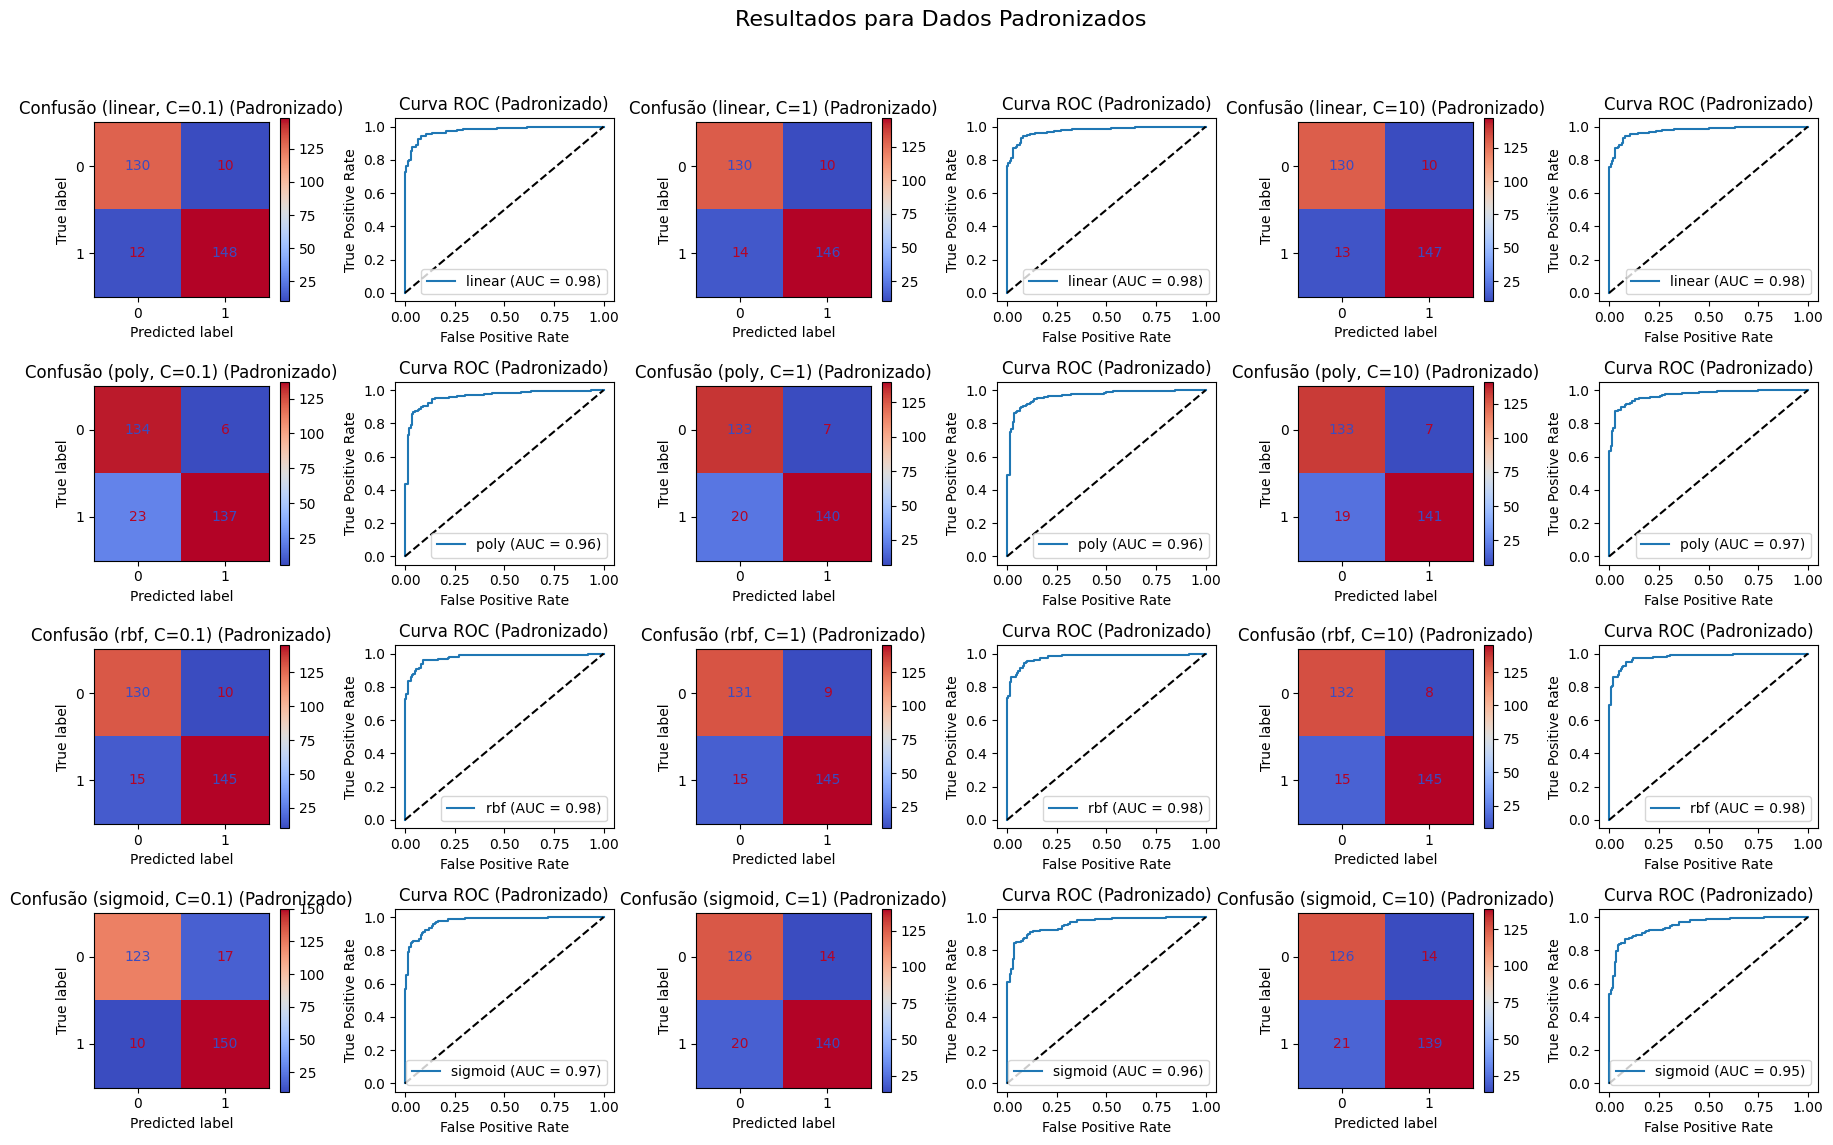

In [ ]:
# Testar diferentes combinações de kernels e valores de C
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]

plt.figure(figsize=(18, 12))

# Plotar resultados para dados não padronizados
for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        plt.subplot(len(kernels), len(C_values)*2, i*len(C_values)*2 + j*2 + 1)
        model, cm, report, fpr, tpr, roc_auc = train_and_evaluate(X_train, X_test, y_train, y_test, kernel, C)

        # Matriz de Confusão
        ConfusionMatrixDisplay(cm).plot(cmap='coolwarm', ax=plt.gca())
        plt.title(f'Confusão ({kernel}, C={C})')

        # Curva ROC
        plt.subplot(len(kernels), len(C_values)*2, i*len(C_values)*2 + j*2 + 2)
        plt.plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Curva ROC')
        plt.legend(loc='best')

plt.suptitle('Resultados para Dados Não Padronizados', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Testar diferentes combinações de kernels e valores de C para dados padronizados
plt.figure(figsize=(18, 12))

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        plt.subplot(len(kernels), len(C_values)*2, i*len(C_values)*2 + j*2 + 1)
        model, cm, report, fpr, tpr, roc_auc = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test, kernel, C)

        # Matriz de Confusão
        ConfusionMatrixDisplay(cm).plot(cmap='coolwarm', ax=plt.gca())
        plt.title(f'Confusão ({kernel}, C={C}) (Padronizado)')

        # Curva ROC
        plt.subplot(len(kernels), len(C_values)*2, i*len(C_values)*2 + j*2 + 2)
        plt.plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Curva ROC (Padronizado)')
        plt.legend(loc='best')

plt.suptitle('Resultados para Dados Padronizados', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. Comentários sobre os Resultados

Ao comparar os resultados dos dados com e sem padronização, podemos observar algumas diferenças importantes:

- **Métricas de Avaliação**: A padronização pode melhorar a performance do modelo, especialmente para kernels não lineares como o RBF. Isso porque o SVM assume que todas as características estão na mesma escala.
- **Curva ROC**: A curva ROC pode mostrar uma diferença significativa, indicando que a padronização pode ajudar o modelo a alcançar uma melhor separação entre as classes.
- **Matriz de Confusão**: A padronização pode reduzir o número de erros de classificação, especialmente se as características estiverem em escalas muito diferentes.


# 6. Conclusão

Neste notebook, analisamos o algoritmo SVM para classificação binária, explorando diferentes tipos de kernels e otimizando os parâmetros. A padronização dos dados foi realizada para verificar como ela impacta o desempenho do modelo.

**Principais Conclusões**:

1. **Impacto da Padronização**: A padronização geralmente melhora o desempenho do SVM, especialmente quando se usa kernels não lineares, pois garante que todas as características estejam na mesma escala.
2. **Métricas de Avaliação**: A padronização pode levar a melhores métricas de avaliação, como a área sob a curva ROC (AUC), que é uma indicação da capacidade do modelo de distinguir entre as classes.
3. **Escolha do Kernel e Parâmetros**: A escolha do kernel e dos parâmetros, como o valor de C, pode influenciar significativamente o desempenho do SVM. Testar diferentes combinações é crucial para encontrar a melhor configuração.

A análise demonstrou a importância da padronização e da seleção adequada de parâmetros para melhorar a performance dos modelos de classificação. Continuar explorando diferentes técnicas e ajustando parâmetros pode levar a melhores resultados em problemas de classificação mais complexos.